In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_image,test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 4s 1us/step


In [9]:
len(test_labels)

10000

In [10]:
test_image.shape

(10000, 28, 28)

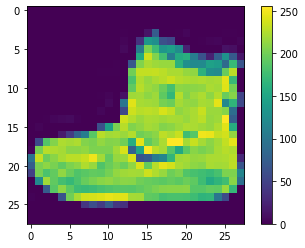

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

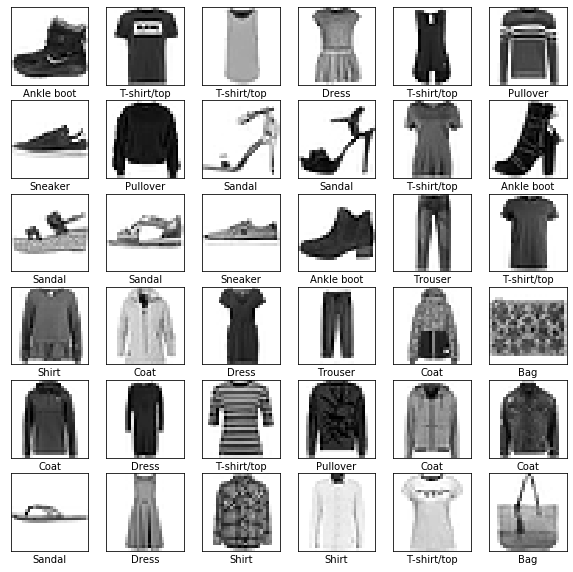

In [28]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_images,train_labels,epochs = 10)

test_loss, test_acc = model.evaluate(test_image,test_labels,verbose = 2)
print('\nTest accuracy:',test_acc)
      
predictions = model.predict(test_image)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4962 - accuracy: 0.8268
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3730 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3309 - accuracy: 0.8795
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3098 - accuracy: 0.8858
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2911 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2773 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2645 - accuracy: 0.9022
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2554 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2466 - accuracy: 0.9070
Epoch

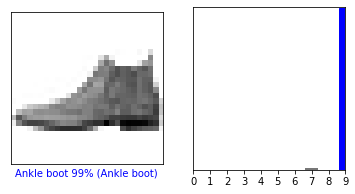

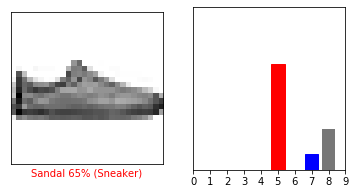

In [47]:
def plot_image(i, predictions_array, true_lable, img):
    predictions_array, true_lable, img = predictions_array,true_lable[i], img[i]
    plt.grid(False) # 设置显示背景的网格线
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary) #在2D常规栅格上显示图像，即数据
    predicted_lable = np.argmax(predictions_array)
    if predicted_lable == true_lable:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_lable],
                                         100 * np.max(predictions_array),
                                         class_names[true_lable]),
                                         color = color)
    
def plot_value_array(i,predictions_array, true_label):
    predictions_array, true_label = predictions_array,true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    plt.grid(False)
    thisplot = plt.bar(range(10),predictions_array,color = "#777777") #绘制直方图
    plt.xlim([0,9])
    plt.ylim([0,1])  #获取或设置当前y轴的限制
    predicted_lable = np.argmax(predictions_array)
    
    thisplot[predicted_lable].set_color('red')
    thisplot[true_label].set_color('blue')
   
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1) #在当前位置上添加子图
plot_image(i,predictions[i],test_labels,test_image)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1) #在当前位置上添加子图
plot_image(i,predictions[i],test_labels,test_image)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

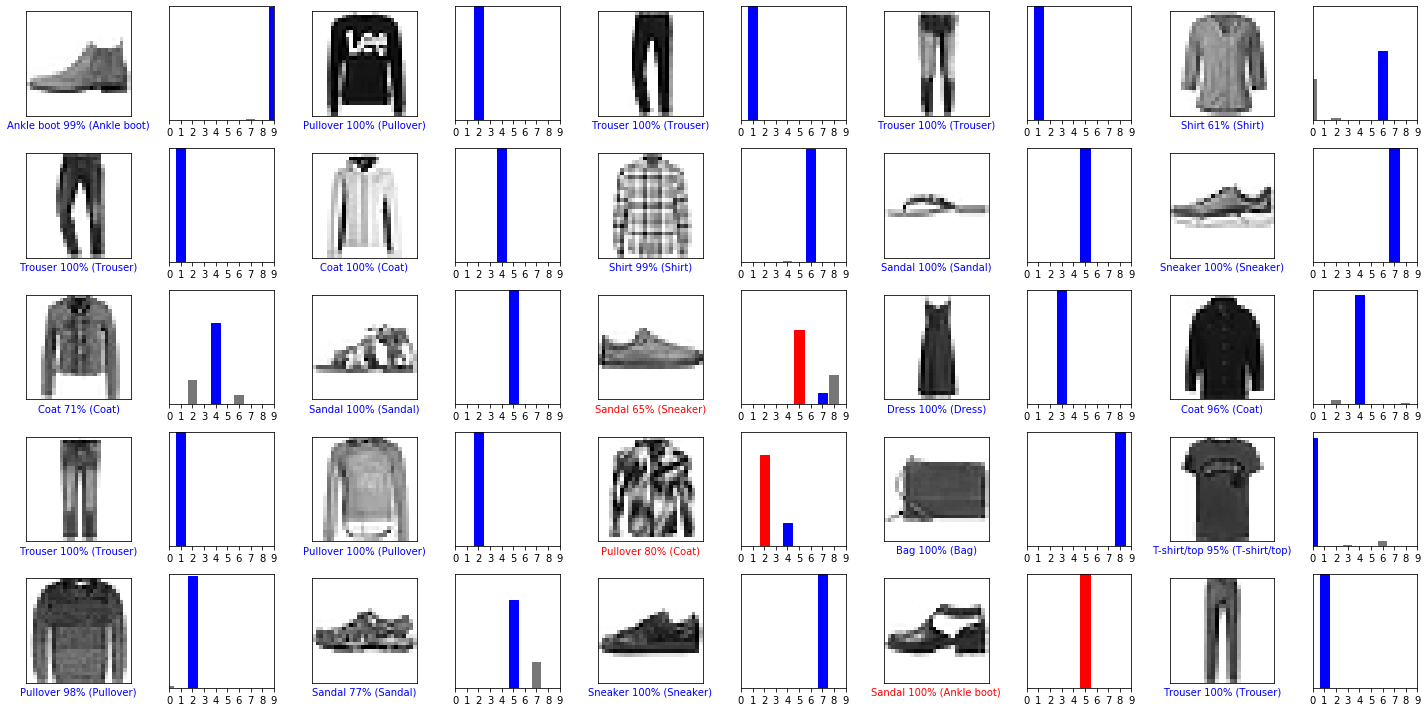

In [48]:
num_rows = 5
num_cols = 5
num_image = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_image):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_image)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout() #该模块提供了用于调整子图参数的例程，以使子图很好地适合图中
plt.show()

In [49]:
img = test_image[0]
print(img.shape)

(28, 28)


In [50]:
img = (np.expand_dims(img,0)) #扩展数组的形状，img 原来的数组，0 扩展维度的位置
print(img.shape)

(1, 28, 28)


In [51]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.83604106e-06 5.39265077e-09 1.04268395e-07 1.15398624e-09
  2.84137923e-06 6.76024705e-04 1.00336547e-06 8.40862747e-03
  1.05396111e-07 9.90909398e-01]]


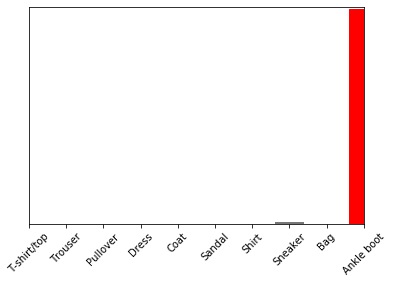

In [54]:
plot_value_array(1,predictions[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation = 45) 
# 获取或设置x轴的刻度位置和标签， rotation 角度